# Barebones example

In [22]:
in_path = 'C:\\Annexe_D\\PER\\data'
in_info_path = 'C:\\Annexe_D\\PER\\in_info'

### Recover ImageNet hierarchy

In [2]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path,
                            in_info_path)

In [25]:
print(in_hier.tree)

{'n02374149': Name: (equine, equid), ImageNet Class: (-1), Descendants: (1), 'n02087551': Name: (hound, hound dog), ImageNet Class: (-1), Descendants: (2), 'n02484473': Name: (Old World monkey, catarrhine), ImageNet Class: (-1), Descendants: (2), 'n02127808': Name: (big cat, cat), ImageNet Class: (-1), Descendants: (3), 'n02401031': Name: (bovid), ImageNet Class: (-1), Descendants: (1), 'n02063224': Name: (baleen whale, whalebone whale), ImageNet Class: (-1), Descendants: (1), 'n02066245': Name: (grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus), ImageNet Class: (147), Descendants: (0), 'n02469914': Name: (primate), ImageNet Class: (-1), Descendants: (7), 'n02496913': Name: (lemur), ImageNet Class: (-1), Descendants: (1), 'n02507649': Name: (procyonid), ImageNet Class: (-1), Descendants: (2), 'n02509815': Name: (lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens), ImageNet Class: (387), Descendants: (0), 'n02075296': Name: (carnivore), Im

### Probe ImageNet hierarchy

In [3]:
for cnt, (wnid, ndesc_in, ndesc_total) in enumerate(in_hier.wnid_sorted):
    if cnt < 10:
        print(f"WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}, #ImageNet descendants: {ndesc_in}")

WordNet ID: n00001740, Name: entity, #ImageNet descendants: 46
WordNet ID: n00001930, Name: physical entity, #ImageNet descendants: 46
WordNet ID: n00002684, Name: object, physical object, #ImageNet descendants: 46
WordNet ID: n00003553, Name: whole, unit, #ImageNet descendants: 46
WordNet ID: n00004258, Name: living thing, animate thing, #ImageNet descendants: 46
WordNet ID: n00004475, Name: organism, being, #ImageNet descendants: 46
WordNet ID: n00015388, Name: animal, animate being, beast, brute, creature, fauna, #ImageNet descendants: 46
WordNet ID: n01466257, Name: chordate, #ImageNet descendants: 42
WordNet ID: n01471682, Name: vertebrate, craniate, #ImageNet descendants: 42
WordNet ID: n01861778, Name: mammal, mammalian, #ImageNet descendants: 21


In [4]:
ancestor_wnid = 'n02120997'
print(f"Superclass | WordNet ID: {ancestor_wnid}, Name: {in_hier.wnid_to_name[ancestor_wnid]}")
for cnt, wnid in enumerate(in_hier.tree[ancestor_wnid].descendants_all):
    if wnid in in_hier.in_wnids:
        print(f"ImageNet subclass | WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}")

Superclass | WordNet ID: n02120997, Name: feline, felid
ImageNet subclass | WordNet ID: n02125311, Name: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
ImageNet subclass | WordNet ID: n02127052, Name: lynx, catamount
ImageNet subclass | WordNet ID: n02129165, Name: lion, king of beasts, Panthera leo
ImageNet subclass | WordNet ID: n02128385, Name: leopard, Panthera pardus
ImageNet subclass | WordNet ID: n02129604, Name: tiger, Panthera tigris


### Find desired number of superclasses

### (Or instead) Directly specify superclasses

In [29]:
superclass_wnid = ['n02051845', 'n01622779', 'n01833805', 'n01829413', 'n01828970', 'n01824575', 'n01820546', 'n01818515', 'n01819313', 'n01843383', 'n01855032', 'n01855672', 'n01860187', 'n01614925', 'n01514859', 'n02058221']
class_ranges, label_map = in_hier.get_subclasses(superclass_wnid,
                                                 balanced=True)

### Create dataset and loader

In [6]:
print(in_path)

C:\Annexe_D\PER\data


In [7]:
print(class_ranges)

[set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set()]


In [8]:
print(label_map)

{0: 'pelican', 1: 'great grey owl, great gray owl, Strix nebulosa', 2: 'hummingbird', 3: 'hornbill', 4: 'bee eater', 5: 'coucal', 6: 'lorikeet', 7: 'macaw', 8: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 9: 'toucan', 10: 'red-breasted merganser, Mergus serrator', 11: 'goose', 12: 'black swan, Cygnus atratus', 13: 'bald eagle, American eagle, Haliaeetus leucocephalus', 14: 'hen', 15: 'albatross, mollymawk'}


In [26]:
import sys, os
dir = "C:\Annexe_D\PER\data\\train"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(dir) if d.is_dir()]
else:
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
classes.sort()
class_to_idx = {classes[i]: i for i in range(len(classes))}
print("class_to_idx")
print(class_to_idx)

class_to_idx
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}


In [30]:
liste_de_sets = [{class_to_idx[identifiant]} for identifiant in superclass_wnid if identifiant in class_to_idx]

In [31]:
print(liste_de_sets)

[{18}, {5}, {13}, {12}, {11}, {10}, {9}, {7}, {8}, {14}, {15}, {16}, {17}, {4}, {3}, {19}]


In [32]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet(in_path,
                                         liste_de_sets)

In [33]:

train_loader, test_loader = custom_dataset.make_loaders(workers=4,
                                                        batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}
aaaaa
['n01443537', 'n01484850', 'n01494475', 'n01514859', 'n01614925', 'n01622779', 'n01744401', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805'

In [34]:
print(train_loader)

In [35]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    print(lab)

tensor([ 4,  2, 11, 15, 15])
tensor([12, 11,  8, 12,  2])
tensor([1, 1, 8, 2, 9])
tensor([13,  9,  3,  3,  1])
tensor([ 3, 12,  2,  1,  2])


In [36]:
print(label_map)

{0: 'pelican', 1: 'great grey owl, great gray owl, Strix nebulosa', 2: 'hummingbird', 3: 'hornbill', 4: 'bee eater', 5: 'coucal', 6: 'lorikeet', 7: 'macaw', 8: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 9: 'toucan', 10: 'red-breasted merganser, Mergus serrator', 11: 'goose', 12: 'black swan, Cygnus atratus', 13: 'bald eagle, American eagle, Haliaeetus leucocephalus', 14: 'hen', 15: 'albatross, mollymawk'}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0028309491..0.9858227].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.006883535..1.007653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00758895..1.0103798].


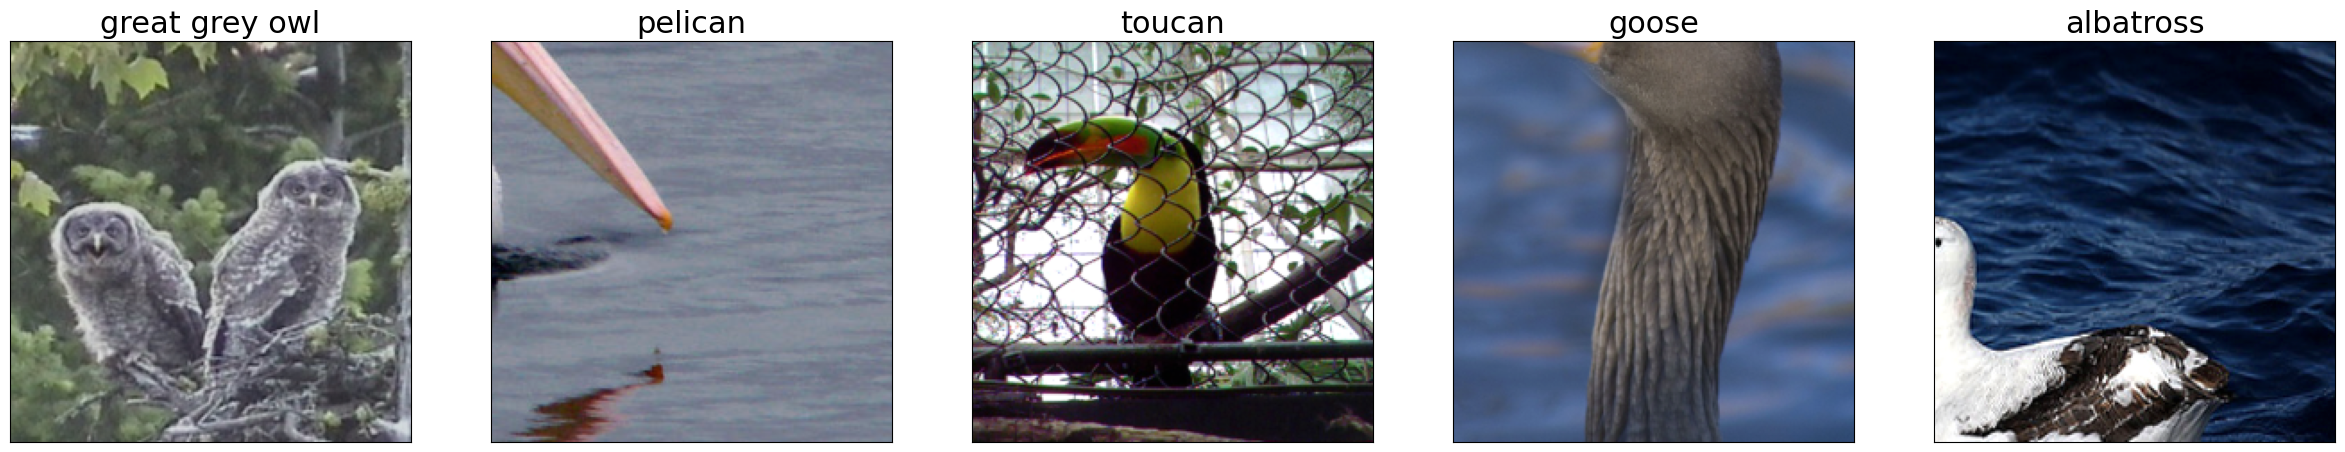

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.025097147..1.0099987].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.004781201..0.90908617].


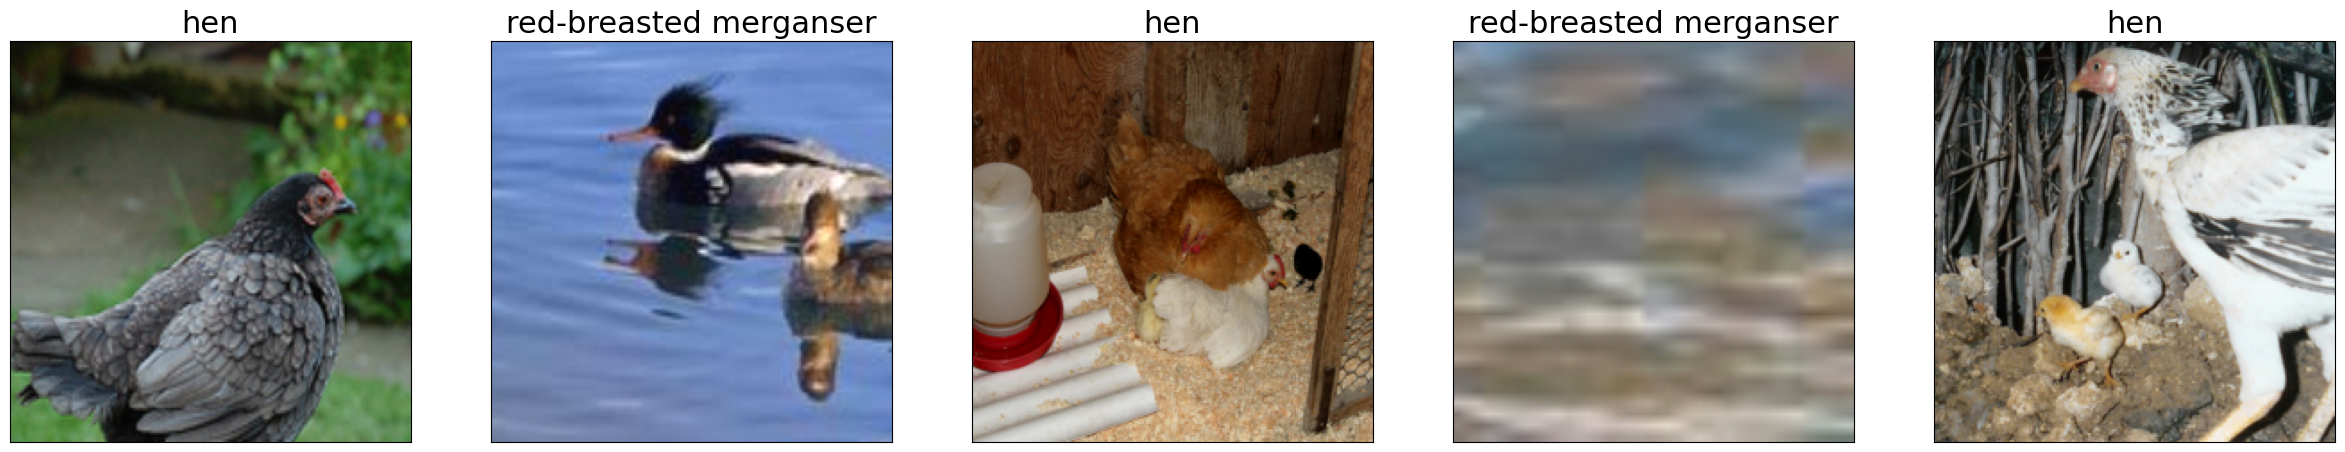

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.050362676..1.0072254].


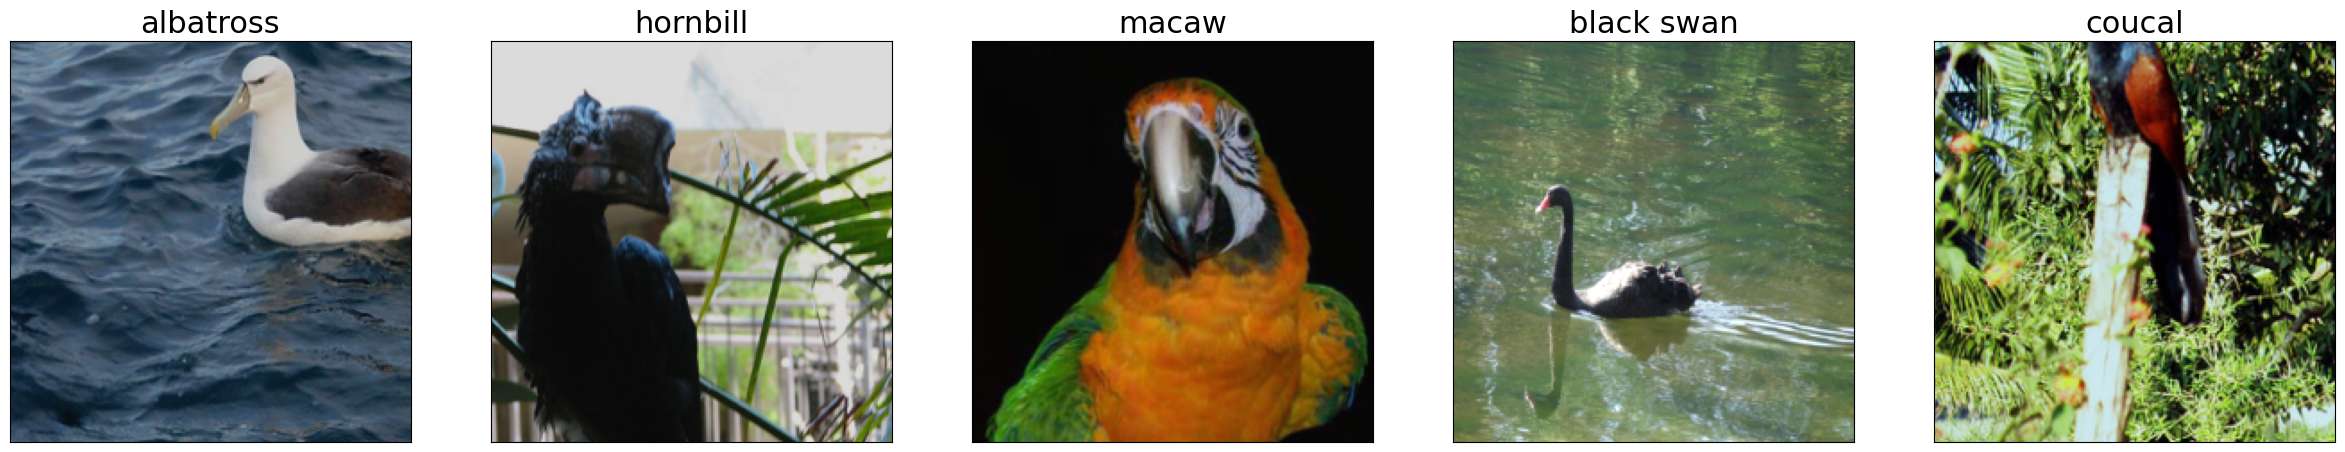

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00560437..0.913294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.004267797..0.996266].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006392503..0.9971847].


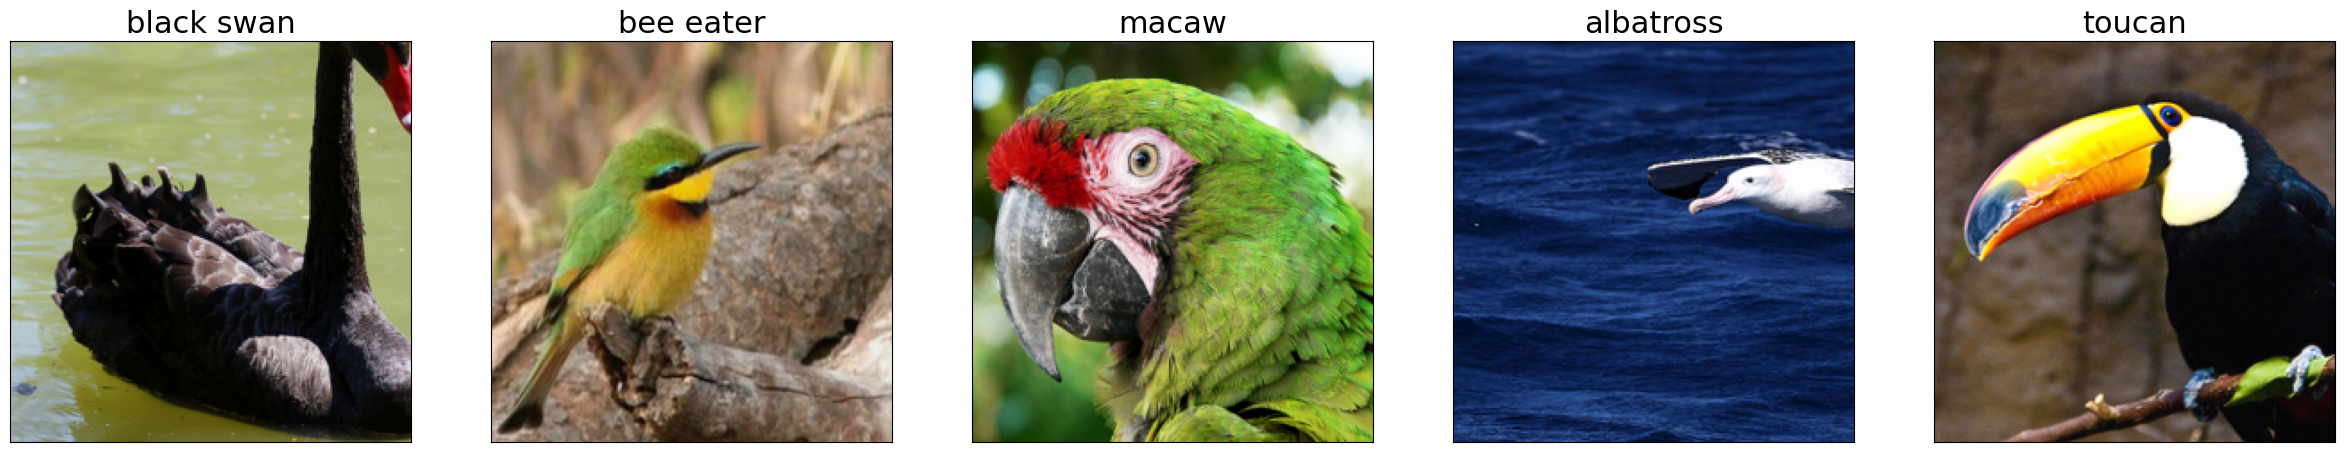

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.009685417..0.8929678].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00077353156..0.9835402].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.013322954..0.9827555].


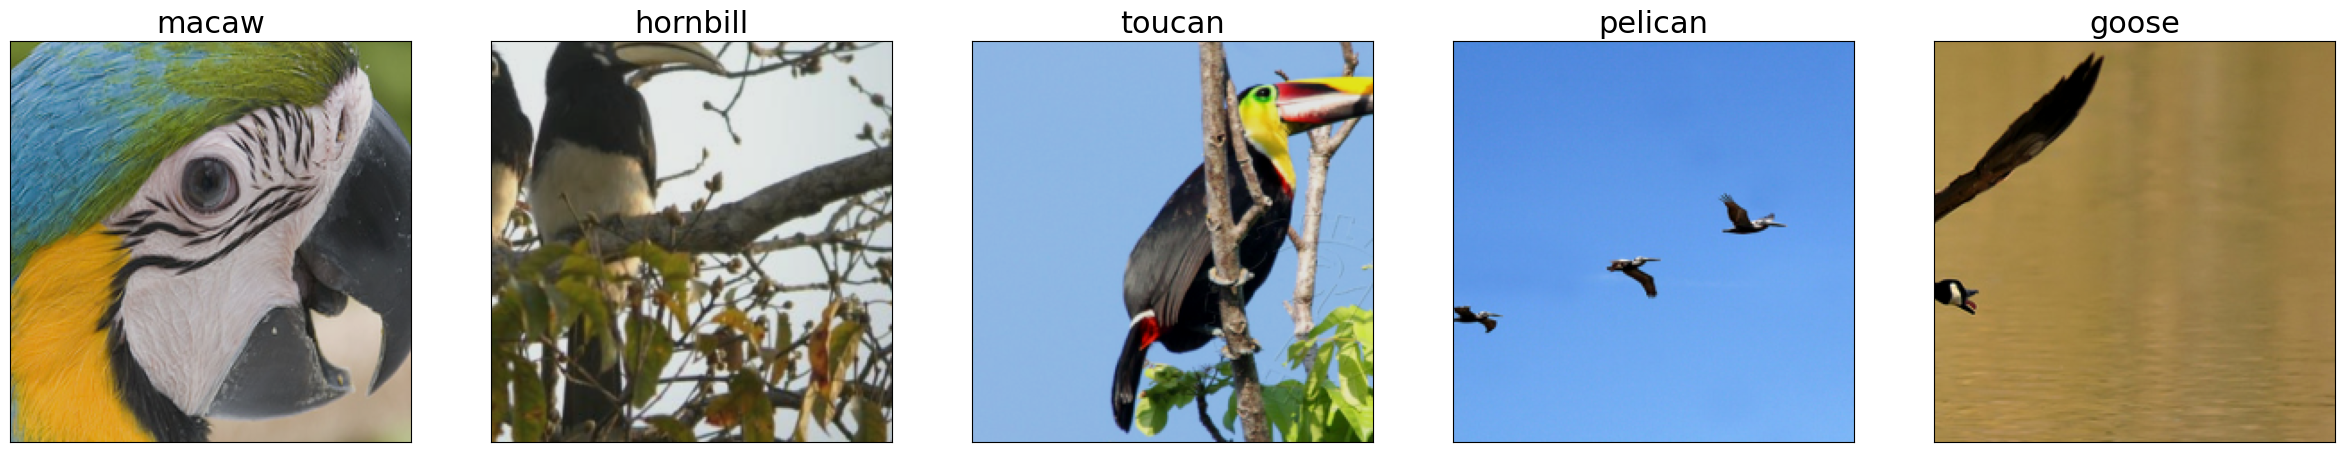

In [37]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    show_image_row([im],
                   tlist=[[label_map[int(k)].split(',')[0] for k in lab]],
                  size=(6, 6),
                  fontsize=22)